In [1]:
# Import our libraries

# Import pandas and numpy 
import pandas as pd
import numpy as np

# Import Seaborn / matplotlib for visualization 
import seaborn as sns 
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline 

# Helper function to split our data 
from sklearn.model_selection import train_test_split 

# Import our Logistic Regression model 
from sklearn.linear_model import LogisticRegression

# Import helper functions to evaluate our model 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

# Import z-score helper function
import scipy.stats as stats

# Import helper functipn for hyper-parameter tuning 
from sklearn.model_selection import GridSearchCV

# Import Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Import Random Forest 
from sklearn.ensemble import RandomForestClassifier

# IMPORT OUR RANDOM FOREST REGERSSOR
from sklearn.ensemble import RandomForestRegressor

# Import metrics to score our model 
from sklearn import metrics


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yatherr/Graduation-/main/healthcare-dataset-stroke-data.csv')
df.stroke.value_counts()
        

0    4861
1     249
Name: stroke, dtype: int64

In [3]:
# Drop the id column -  I don't need it? irrelavant. 
df.drop(columns=['id'], inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# Print df before filling bmi null values
print('Before Null Fill')
print(df.isnull().sum())
print()

# Fill the bmi null values in df with the mean of bmi
df['bmi'] = df.bmi.fillna(df.bmi.mean())

# Print out df after filling bmi null values 
print('After Null Fill')
print(df.isnull().sum())
print()

Before Null Fill
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

After Null Fill
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64



In [5]:
# Remove entries with gender Other from df 
df = df[df['gender'] != 'Other']

print("STROKE COUNTS AFTER GENDER OTHER REMOVAL")
print(df.stroke.value_counts())
print()

print("gender VALUE COUNTS AFTER OTHER REMOVAL")
print(df.gender.value_counts())
print()


STROKE COUNTS AFTER GENDER OTHER REMOVAL
0    4860
1     249
Name: stroke, dtype: int64

gender VALUE COUNTS AFTER OTHER REMOVAL
Female    2994
Male      2115
Name: gender, dtype: int64



In [6]:
# Remove 'Other' gender entries from df - 
print("STROKE COUNTS BEFORE GENDER OTHER REMOVAL")
print(df.stroke.value_counts())
print()

print("gender VALUE COUNTS BEFORE OTHER REMOVAL")
print(df.gender.value_counts())
print()

STROKE COUNTS BEFORE GENDER OTHER REMOVAL
0    4860
1     249
Name: stroke, dtype: int64

gender VALUE COUNTS BEFORE OTHER REMOVAL
Female    2994
Male      2115
Name: gender, dtype: int64



In [7]:
# Normalize our numerical features to ensure they have equal weight when I build my classifiers

# Create a new column for normalized age
df['age_norm']=(df['age']-df['age'].min())/(df['age'].max()-df['age'].min())

# Create a new column for normalized avg glucose level
df['avg_glucose_level_norm']=(df['avg_glucose_level']-df['avg_glucose_level'].min())/(df['avg_glucose_level'].max()-df['avg_glucose_level'].min())

# Create a new column for normalized bmi
df['bmi_norm']=(df['bmi']-df['bmi'].min())/(df['bmi'].max()-df['bmi'].min())

df.head(15)

<ipython-input-7-84df3b13407e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_norm']=(df['age']-df['age'].min())/(df['age'].max()-df['age'].min())
<ipython-input-7-84df3b13407e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_glucose_level_norm']=(df['avg_glucose_level']-df['avg_glucose_level'].min())/(df['avg_glucose_level'].max()-df['avg_glucose_level'].min())
<ipython-input-7-84df3b13407e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0.816895,0.801265,0.301260
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0.743652,0.679023,0.212981
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0.975586,0.234512,0.254296
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0.597168,0.536008,0.276060
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0.963379,0.549349,0.156930
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1,0.987793,0.605161,0.214204
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1,0.902344,0.069107,0.195876
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1,0.841309,0.181285,0.143184
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1,0.719238,0.097082,0.212981
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1,0.951172,0.015927,0.159221


In [8]:
df2 = pd.read_csv('https://raw.githubusercontent.com/yatherr/Graduation-/main/train_strokes.csv')
print("MAKEUP OF 2nd DATASET")
print(df2.stroke.value_counts())
df2

MAKEUP OF 2nd DATASET
0    42617
1      783
Name: stroke, dtype: int64


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [9]:
# Drop the id column
df2.drop(columns=['id'], inplace=True)
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [10]:
# Print df2 before filling bmi null values
print('Before Null Fill')
print(df2.isnull().sum())
print()


Before Null Fill
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64



In [11]:
# Fill the bmi null values in df2
df2['bmi'] = df2.bmi.fillna(df2.bmi.mean())

# Print out df2 after filling bmi null values 
print('After Null Fill')
print(df2.isnull().sum())

After Null Fill
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64


In [12]:
# Create a new category for the smoking null values

# Print df2 before filling smoking status null values
print('Before Null Fill')
print(df2.isnull().sum())
print()

print('smoking_status VALUE COUNTS BEFORE NULL FILL')
print(df2.smoking_status.value_counts())
print()

df2['smoking_status'] = df2['smoking_status'].fillna('not known')

print('After Null Fill')
print(df2.isnull().sum())
print()

Before Null Fill
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                      0
smoking_status       13292
stroke                   0
dtype: int64

smoking_status VALUE COUNTS BEFORE NULL FILL
never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

After Null Fill
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64



In [13]:
# Check to make sure the new category was created
print('smoking_status VALUE COUNTS AFTER NULL FILL')
print(df2.smoking_status.value_counts())
print()

smoking_status VALUE COUNTS AFTER NULL FILL
never smoked       16053
not known          13292
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64



In [14]:
# Remove 'Other' gender entries from df2
print("STROKE COUNTS BEFORE GENDER OTHER REMOVAL")
print(df2.stroke.value_counts())
print()

print("gender VALUE COUNTS BEFORE OTHER REMOVAL")
print(df2.gender.value_counts())
print()

# Remove entries with gender Other from df2
df2 = df2[df2['gender'] != 'Other']

print("STROKE COUNTS AFTER GENDER OTHER REMOVAL")
print(df2.stroke.value_counts())
print()

print("gender VALUE COUNTS AFTER OTHER REMOVAL")
print(df2.gender.value_counts())
print()

STROKE COUNTS BEFORE GENDER OTHER REMOVAL
0    42617
1      783
Name: stroke, dtype: int64

gender VALUE COUNTS BEFORE OTHER REMOVAL
Female    25665
Male      17724
Other        11
Name: gender, dtype: int64

STROKE COUNTS AFTER GENDER OTHER REMOVAL
0    42606
1      783
Name: stroke, dtype: int64

gender VALUE COUNTS AFTER OTHER REMOVAL
Female    25665
Male      17724
Name: gender, dtype: int64



In [15]:
# Normalize our numerical features to ensure they have equal weight when I build my classifiers

# Create a new column for normalized age
df2['age_norm']=(df2['age']-df2['age'].min())/(df2['age'].max()-df2['age'].min())

# Create a new column for normalized avg glucose level
df2['avg_glucose_level_norm']=(df2['avg_glucose_level']-df2['avg_glucose_level'].min())/(df2['avg_glucose_level'].max()-df2['avg_glucose_level'].min())

# Create a new column for normalized bmi
df2['bmi_norm']=(df2['bmi']-df2['bmi'].min())/(df2['bmi'].max()-df2['bmi'].min())

df2

<ipython-input-15-4215d7860d07>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['age_norm']=(df2['age']-df2['age'].min())/(df2['age'].max()-df2['age'].min())
<ipython-input-15-4215d7860d07>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['avg_glucose_level_norm']=(df2['avg_glucose_level']-df2['avg_glucose_level'].min())/(df2['avg_glucose_level'].max()-df2['avg_glucose_level'].min())
<ipython-input-15-4215d7860d07>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,not known,0,0.035645,0.169964,0.090286
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,0.707031,0.139631,0.332571
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,not known,0,0.096680,0.236772,0.085714
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,0.853516,0.059479,0.294857
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,not known,0,0.169922,0.450244,0.102857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,0.121094,0.015420,0.117714
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,0.682617,0.671934,0.517714
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,1.000000,0.156492,0.214857
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,0.487305,0.187079,0.264000


In [16]:
# Merge the two df's
print('Stroke Makeup of df Before Merge')
print(df.stroke.value_counts())
print()

print('Stroke Makeup of df2 Before Merge')
print(df2.stroke.value_counts())
print()

df_master = df.merge(df2, how='outer') 

print('Stroke Makeup of df_master')
print(df_master.stroke.value_counts())
df_master

Stroke Makeup of df Before Merge
0    4860
1     249
Name: stroke, dtype: int64

Stroke Makeup of df2 Before Merge
0    42606
1      783
Name: stroke, dtype: int64

Stroke Makeup of df_master
0    47466
1     1032
Name: stroke, dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0.816895,0.801265,0.301260
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0.743652,0.679023,0.212981
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0.975586,0.234512,0.254296
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0.597168,0.536008,0.276060
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0.963379,0.549349,0.156930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48493,Female,10.0,0,0,No,children,Urban,58.64,20.400000,never smoked,0,0.121094,0.015420,0.117714
48494,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.400000,formerly smoked,0,0.682617,0.671934,0.517714
48495,Female,82.0,1,0,Yes,Private,Urban,91.94,28.900000,formerly smoked,0,1.000000,0.156492,0.214857
48496,Male,40.0,0,0,Yes,Private,Urban,99.16,33.200000,never smoked,0,0.487305,0.187079,0.264000


In [17]:
# Create a df from dataset with just the stroke entries 
s_df = df_master.loc[df_master['stroke'] == 1]
print(s_df.stroke.value_counts())
s_df

1    1032
Name: stroke, dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0.816895,0.801265,0.301260
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0.743652,0.679023,0.212981
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0.975586,0.234512,0.254296
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0.597168,0.536008,0.276060
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0.963379,0.549349,0.156930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48246,Female,56.0,0,0,Yes,Private,Rural,83.27,32.900000,smokes,1,0.682617,0.119763,0.260571
48366,Male,69.0,0,0,Yes,Self-employed,Rural,97.36,28.000000,not known,1,0.841309,0.179454,0.204571
48402,Female,80.0,0,0,Yes,Self-employed,Urban,75.91,26.700000,never smoked,1,0.975586,0.088583,0.189714
48416,Male,62.0,1,1,Yes,Private,Rural,77.97,31.500000,formerly smoked,1,0.755859,0.097310,0.244571


In [18]:
# Remove age outliers from s_df
print("s_df COUNT BEFORE AGE OUTLIER REMOVAL")
print(s_df.stroke.value_counts())
print()

s_df = s_df.loc[s_df['age'] >= 45]

print("s_df COUNT AFTER AGE OUTLIER REMOVAL")
print(s_df.stroke.value_counts())

s_df COUNT BEFORE AGE OUTLIER REMOVAL
1    1032
Name: stroke, dtype: int64

s_df COUNT AFTER AGE OUTLIER REMOVAL
1    987
Name: stroke, dtype: int64


In [19]:
# Create a df from the dataset with the no stroke entries 
n_df = df_master.sample(n=1100, random_state=30)
print(n_df.stroke.value_counts())
print()
n_df = n_df.loc[n_df['stroke'] == 0] 
print(n_df.stroke.value_counts())
n_df

0    1086
1      14
Name: stroke, dtype: int64

0    1086
Name: stroke, dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm
7460,Male,57.0,0,0,Yes,Private,Urban,90.40,26.5,never smoked,0,0.694824,0.149968,0.187429
9553,Female,55.0,0,0,Yes,Private,Urban,65.22,19.8,never smoked,0,0.670410,0.043296,0.110857
271,Female,49.0,0,0,Yes,Private,Rural,60.22,31.5,smokes,0,0.597168,0.023544,0.242841
968,Female,55.0,0,0,Yes,Private,Rural,112.47,32.8,smokes,0,0.670410,0.264749,0.257732
11632,Male,50.0,0,0,Yes,Private,Rural,89.46,43.4,not known,0,0.609375,0.145986,0.380571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Male,17.0,0,0,No,Never_worked,Urban,113.25,23.4,never smoked,0,0.206543,0.268350,0.150057
37336,Male,53.0,0,0,Yes,Private,Rural,229.04,30.6,never smoked,0,0.645996,0.737301,0.234286
37657,Male,40.0,0,0,Yes,Govt_job,Urban,78.50,22.3,never smoked,0,0.487305,0.099555,0.139429
46813,Male,20.0,0,0,No,Private,Rural,94.54,29.7,not known,0,0.243164,0.167507,0.224000


In [20]:
# Check for null values and duplicates
print("Null value check: s_df")
print(s_df.isnull().sum())
print()

print("Null value check: n_df")
print(n_df.isnull().sum())
print()

print("Duplicate check: s_df")
print(s_df.duplicated().sum())
print()

print("Duplicate check: n_df")
print(n_df.duplicated().sum())
print()

Null value check: s_df
gender                    0
age                       0
hypertension              0
heart_disease             0
ever_married              0
work_type                 0
Residence_type            0
avg_glucose_level         0
bmi                       0
smoking_status            0
stroke                    0
age_norm                  0
avg_glucose_level_norm    0
bmi_norm                  0
dtype: int64

Null value check: n_df
gender                    0
age                       0
hypertension              0
heart_disease             0
ever_married              0
work_type                 0
Residence_type            0
avg_glucose_level         0
bmi                       0
smoking_status            0
stroke                    0
age_norm                  0
avg_glucose_level_norm    0
bmi_norm                  0
dtype: int64

Duplicate check: s_df
0

Duplicate check: n_df
0



In [21]:
# Merge s_df and n_df to create our dataset we are going to build a classifiers from
print('STROKE COUNT OF s_df')
print(s_df.stroke.value_counts())
print()

print('STROKE COUNT OF n_df')
print(n_df.stroke.value_counts())
print()

# Merge them
df_final = s_df.merge(n_df, how='outer') 
print('STROKE COUNT OF df_final')
print(df_final.stroke.value_counts())
df_final

STROKE COUNT OF s_df
1    987
Name: stroke, dtype: int64

STROKE COUNT OF n_df
0    1086
Name: stroke, dtype: int64

STROKE COUNT OF df_final
0    1086
1     987
Name: stroke, dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_norm,avg_glucose_level_norm,bmi_norm
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0.816895,0.801265,0.301260
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0.743652,0.679023,0.212981
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0.975586,0.234512,0.254296
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,0.597168,0.536008,0.276060
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0.963379,0.549349,0.156930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,Male,17.0,0,0,No,Never_worked,Urban,113.25,23.400000,never smoked,0,0.206543,0.268350,0.150057
2069,Male,53.0,0,0,Yes,Private,Rural,229.04,30.600000,never smoked,0,0.645996,0.737301,0.234286
2070,Male,40.0,0,0,Yes,Govt_job,Urban,78.50,22.300000,never smoked,0,0.487305,0.099555,0.139429
2071,Male,20.0,0,0,No,Private,Rural,94.54,29.700000,not known,0,0.243164,0.167507,0.224000


In [22]:
# Check to make sure there are no null or duplicate values
print("NULL VALUES CHECK")
print(df_final.isnull().sum())
print()

print('DUPLICATE CHECK')
print(df_final.duplicated().sum())

NULL VALUES CHECK
gender                    0
age                       0
hypertension              0
heart_disease             0
ever_married              0
work_type                 0
Residence_type            0
avg_glucose_level         0
bmi                       0
smoking_status            0
stroke                    0
age_norm                  0
avg_glucose_level_norm    0
bmi_norm                  0
dtype: int64

DUPLICATE CHECK
0


In [23]:
# Convert certain features into numerical values
df_final = pd.get_dummies(df_final, columns=['gender', 'Residence_type', 'smoking_status', 'ever_married', 'work_type'])
df_final

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_norm,avg_glucose_level_norm,bmi_norm,gender_Female,...,smoking_status_never smoked,smoking_status_not known,smoking_status_smokes,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,67.0,0,1,228.69,36.600000,1,0.816895,0.801265,0.301260,0,...,0,0,0,0,1,0,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,0.743652,0.679023,0.212981,1,...,1,0,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,0.975586,0.234512,0.254296,0,...,1,0,0,0,1,0,0,1,0,0
3,49.0,0,0,171.23,34.400000,1,0.597168,0.536008,0.276060,1,...,0,0,1,0,1,0,0,1,0,0
4,79.0,1,0,174.12,24.000000,1,0.963379,0.549349,0.156930,1,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,17.0,0,0,113.25,23.400000,0,0.206543,0.268350,0.150057,0,...,1,0,0,1,0,0,1,0,0,0
2069,53.0,0,0,229.04,30.600000,0,0.645996,0.737301,0.234286,0,...,1,0,0,0,1,0,0,1,0,0
2070,40.0,0,0,78.50,22.300000,0,0.487305,0.099555,0.139429,0,...,1,0,0,0,1,1,0,0,0,0
2071,20.0,0,0,94.54,29.700000,0,0.243164,0.167507,0.224000,0,...,0,1,0,1,0,0,0,1,0,0


In [24]:
# Begin to train our model 

#selected_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_Male', 
#                     'gender_Other', 'Residence_type_Urban','smoking_status_formerly smoked', 
#                     'smoking_status_never smoked', 'smoking_status_smokes', 'ever_married_Yes', 
#                     'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 
#                     'work_type_children']

#selected_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'gender_Male', 
#                     'Residence_type_Urban','smoking_status_formerly smoked', 
#                     'smoking_status_never smoked', 'smoking_status_smokes', 'ever_married_Yes', 
#                     'work_type_Private', 'work_type_Self-employed']

# selected_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'smoking_status_formerly smoked', 'bmi',
#                      'gender_Male', 'Residence_type_Urban', 'smoking_status_never smoked', 
#                      'smoking_status_smokes', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 
#                      'work_type_Self-employed', 'work_type_children']

# selected_features = ['age_norm', 'hypertension', 'heart_disease', 'avg_glucose_level_norm',
#                     'bmi_norm', 'ever_married_No', 'ever_married_Yes']

selected_features = ['age_norm', 'bmi_norm', 'avg_glucose_level_norm', 'hypertension', 
                    'heart_disease']

X = df_final[selected_features]

y = df_final['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=30)

print('Length of our Training Data: ', X_train.shape, '\nLength of our Testing Data: ', y_test.shape)

Length of our Training Data:  (1762, 5) 
Length of our Testing Data:  (311,)


# RANDOM FOREST MODEL

In [25]:
# Init our Random Forest Classifier Model 
model = RandomForestClassifier()

# Fit our model 
model.fit(X_train, y_train)

# Make our predictions
y_pred = model.predict(X_test)

# Calculate Accuracy, Precision, Recall, F1
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

Accuracy Score: 0.803859
Precision Score: 0.740741
Recall Score: 0.863309
F1 Score: 0.797342


# LOGISTIC REGRESSION MODEL

In [26]:
#  Log Regression model
model = LogisticRegression()

# Fit and train our model
model.fit(X_train, y_train)

# Make new predictions
y_pred = model.predict(X_test)

# Calculate accuracu, precision, recall, f1
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

# Print each of our scores to inspect performance.
print("Accuracy Score: %f" % accuracy)
print("Precision Score: %f" % precision)
print("Recall Score: %f" % recall)
print('F1 Score %f' % f1)

Accuracy Score: 0.765273
Precision Score: 0.711538
Recall Score: 0.798561
F1 Score 0.752542


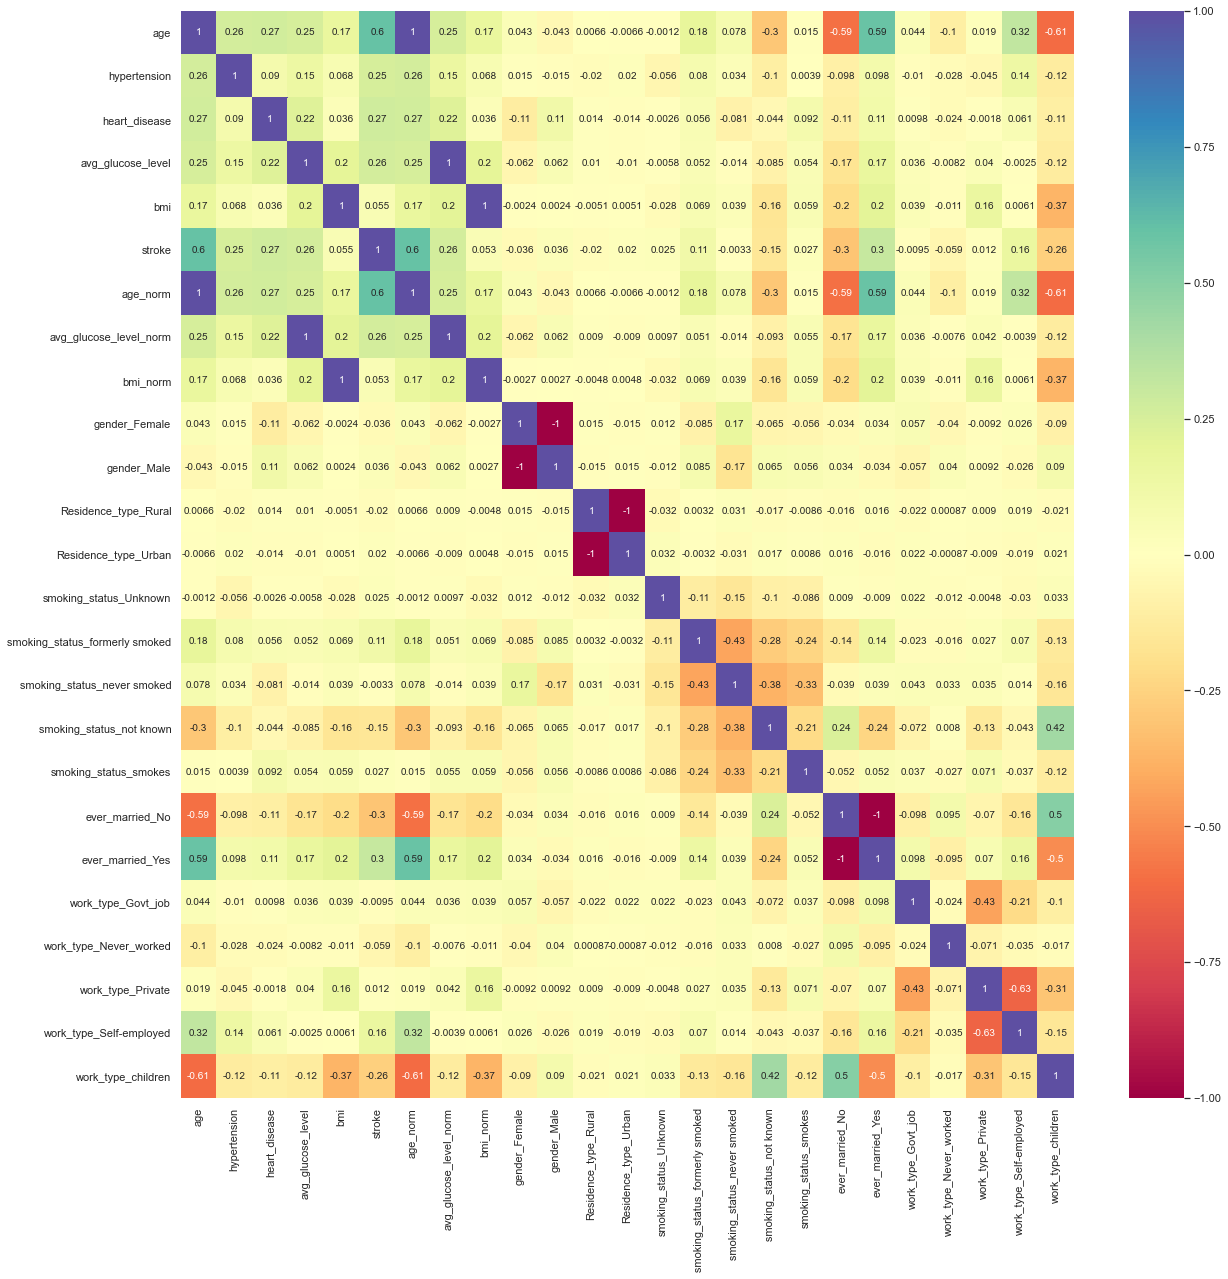

In [27]:
# HEATMAP
plt.figure(figsize=(20,20))
sns.heatmap(df_final.corr(), annot=True, cmap='Spectral')

In [28]:
# It is hard to read the heatmap so I am going to print out some of the values 
print("Correlation between strokes and age")
df_final["stroke"].corr(df_final["age"], method='pearson')

Correlation between strokes and age


0.5984734544808239

In [29]:
print("Correlation between strokes and hypertension")
df_final["stroke"].corr(df_final["hypertension"], method='pearson')

Correlation between strokes and hypertension


0.25193268734730856

In [30]:
print("Correlation between strokes and heart disease")
df_final["stroke"].corr(df_final["heart_disease"], method='pearson')

Correlation between strokes and heart disease


0.27464111429073196

In [31]:
print("Correlation between strokes and average glucose level")
df_final["stroke"].corr(df_final["avg_glucose_level"], method='pearson')

Correlation between strokes and average glucose level


0.25848822642769437